## Práctica 4 IA Entrenamiento de red neuronal
### HERRERA MACEDO KAROL MARILÚ 6IV8

In [12]:
#HERRERA MACEDO KAROL MARILU 6IV8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capas completamente conectadas
from tensorflow.keras.layers import Dense
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# Cargar datos ignorando la fila de encabezado
data_df = pd.read_csv("diabetes.csv", header=None, skiprows=1)
# Convertir todas las columnas a numéricas (maneja errores como NaN)
data_df = data_df.apply(pd.to_numeric, errors='coerce')
# Eliminar filas con valores no convertidos (NaN)
data_df = data_df.dropna()
# Mostrar información del dataset
print("\nInformación del dataset:")
data_df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Preparar datos
X = data_df.iloc[:, 0:8].values.astype('float32')  # Primeras 8 columnas
y = data_df.iloc[:, 8].values.astype('float32')    # Novena columna

In [4]:
# Verificar dimensiones y tipos
print("\nForma de X:", X.shape)
print("Tipo de X:", X.dtype)
print("Forma de y:", y.shape)
print("Tipo de y:", y.dtype)


Forma de X: (768, 8)
Tipo de X: float32
Forma de y: (768,)
Tipo de y: float32


In [5]:
# Crear red neuronal
model = Sequential()

# Capa de entrada (12 neuronas) y primera capa oculta
model.add(Dense(12, input_dim=8, activation='relu'))

# Segunda capa oculta (8 neuronas)
model.add(Dense(8, activation='relu'))

# Capa de salida (1 neurona con activación sigmoide)
model.add(Dense(1, activation='sigmoid'))

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Resumen del modelo
print("\nResumen del modelo:")
model.summary()


Resumen del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilar el modelo
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
# Entrenamiento del modelo
print("\nIniciando entrenamiento...")
historial = model.fit(
    X, 
    y,
    epochs=75,
    verbose=2  # Corregido: verbose=2
)


Iniciando entrenamiento...
Epoch 1/75
24/24 - 1s - 30ms/step - accuracy: 0.3490 - loss: 8.2071
Epoch 2/75
24/24 - 0s - 2ms/step - accuracy: 0.4896 - loss: 1.7347
Epoch 3/75
24/24 - 0s - 2ms/step - accuracy: 0.5742 - loss: 1.1906
Epoch 4/75
24/24 - 0s - 2ms/step - accuracy: 0.5677 - loss: 1.0682
Epoch 5/75
24/24 - 0s - 2ms/step - accuracy: 0.5586 - loss: 0.9810
Epoch 6/75
24/24 - 0s - 2ms/step - accuracy: 0.5755 - loss: 0.9320
Epoch 7/75
24/24 - 0s - 2ms/step - accuracy: 0.5781 - loss: 0.9039
Epoch 8/75
24/24 - 0s - 2ms/step - accuracy: 0.5872 - loss: 0.8697
Epoch 9/75
24/24 - 0s - 2ms/step - accuracy: 0.6081 - loss: 0.8674
Epoch 10/75
24/24 - 0s - 2ms/step - accuracy: 0.5872 - loss: 0.8526
Epoch 11/75
24/24 - 0s - 2ms/step - accuracy: 0.5924 - loss: 0.8235
Epoch 12/75
24/24 - 0s - 2ms/step - accuracy: 0.5938 - loss: 0.8057
Epoch 13/75
24/24 - 0s - 2ms/step - accuracy: 0.5924 - loss: 0.7986
Epoch 14/75
24/24 - 0s - 2ms/step - accuracy: 0.6068 - loss: 0.7956
Epoch 15/75
24/24 - 0s - 2ms

Text(0, 0.5, 'Pérdida')

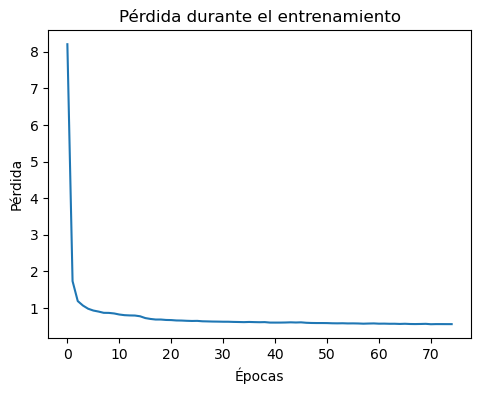

In [9]:
# Gráfica de pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

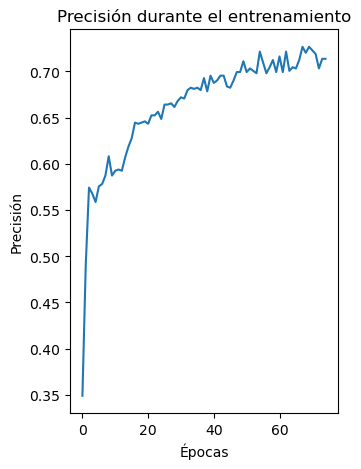

In [10]:
# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'])
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')

plt.tight_layout()
plt.show()

In [11]:
# Evaluación final
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"\nPrecisión final del modelo: {accuracy:.4f}")


Precisión final del modelo: 0.7135


## Práctica 4 HERRERA MACEDO KAROL MARILÚ 6IV8